In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [18]:
minhp = 100 # minimum horse power
maxhp = 600 # maximum horse power
lowestpr = 5 # lowest price
highestpr = 50 # highest price

fprice_low = 20 # lowest price family car
fprice_high = 40 # highest price family car
fpower_low = 300 # lowest horse power family car
fpower_high = 500 # highest horse power family car

family_car = [[random.uniform(fprice_low,fprice_high),random.uniform(fpower_low,fpower_high),1] for i in range(100)]


In [19]:
other_car = []
for i in range(100):
    price = random.uniform(lowestpr,highestpr)
    horse_power = random.uniform(minhp,maxhp)
    while price>fprice_low and price<fprice_high and horse_power > fpower_low and horse_power < fpower_high:
        price = random.uniform(lowestpr, highestpr)
        horse_power = random.uniform(minhp,maxhp)
    other_car.append([price,horse_power,0]) 
print(len(other_car))

100


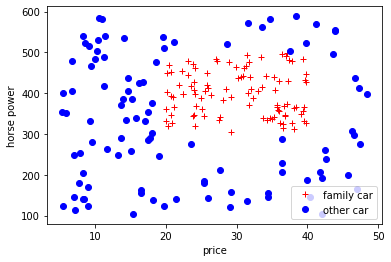

In [20]:
dataset = family_car+other_car
dataset = np.array(dataset)
fig,ax = plt.subplots()
family_car = np.array(family_car)
other_car = np.array(other_car)
ax.plot(family_car[:,0],family_car[:,1],'+',color = 'red',label= 'family car')
ax.plot(other_car[:,0],other_car[:,1],'o',color = 'blue',label= 'other car')
ax.set_xlabel('price')
ax.set_ylabel('horse power')
ax.legend()


[141 193 132 177 140  61 160  49 161  57 176 163  30 108  97 102 152 120
 134  58 130 182  76  34 151  94 198  59  82  72  88   1 146 195 197 184
  15  93 105  42  66 126 162 135 144 181  38  48  65 118  53  32 196 157
  83  56 107 179   0  96 149  40  62 117  84  99  14  79  31 150 139  19
 158  17  69 166 168 156 174  90 194   4 173  86  20  91 183 111   6  13
 159 147  89 189  46 129 115 128 155  47  80 116 136 199 127 164 124  64
   8 171  81  92 121  44  74 170  28 137 190 119]


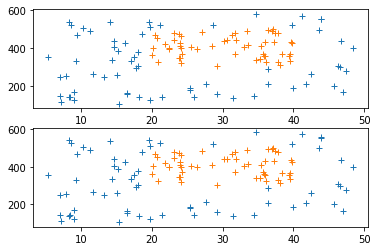

In [21]:
n=np.array(range(200))
np.random.shuffle(n)
mask_training=n[:120]
training_data=dataset[mask_training,:]
print(mask_training)
mask_test=n[120:]
test_data=dataset[mask_test,:]

fig, ax=plt.subplots(2)
for x,y,z in training_data:
    ax[0].plot(x,y,'+',color=f'C{int(z)}',label='training data')

for x,y,z in training_data:
    ax[1].plot(x,y,'+',color=f'C{int(z)}',label='test data')

In [22]:
def error_function(data,p1,p2,e1,e2):
    error=0
    for i in data:
        price=i[0]
        horsepower=i[1]
        label=i[2]
        if (price>p1 and price >p2 and horsepower>e1 and horsepower>e2):
            if label!=1:
                error+=1
        else:
            if label!=0:
                error+=1
    return error

In [23]:
e=error_function(training_data,30,40,300,500)
e

58

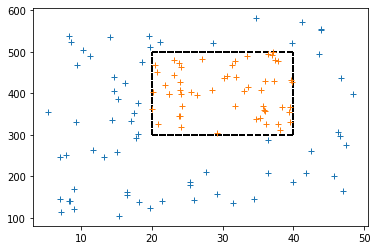

In [24]:
fig, ax=plt.subplots()
for x,y,z in training_data:
    ax.plot(x,y,'+',color=f'C{int(z)}',label='training data')
    ax.hlines(300,20,40,linestyles='dashed')
    ax.hlines(500,20,40,linestyles='dashed')
    ax.vlines(20,300,500,linestyles='dashed')
    ax.vlines(40,300,500,linestyles='dashed')

In [25]:
errors=[]
values=[]
p1_range=list(range(15,25,1))
p2_range=list(range(35,45,1))
e1_range=list(range(280,320,10))
e2_range=list(range(480,520,10))

for p1 in p1_range:
    for p2 in p2_range:
        for e1 in e1_range:
            for e2 in e2_range:
                error=error_function(training_data,p1,p2,e1,e2)
                errors.append(error)
                values.append([p1,p2,e1,e2])
                

In [26]:
def locate_min(a):
    smallest=min(a)
    return smallest, [index for index, element in enumerate(a) if smallest== element]


In [27]:
minimum_value,index=locate_min(errors)
print(minimum_value)
print(index)

55
[144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599]


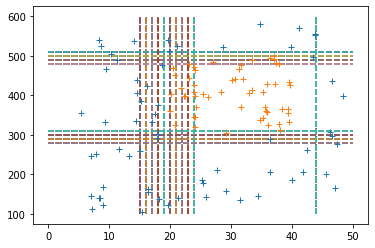

In [28]:
fig, ax=plt.subplots()
for x,y,z in training_data:
    ax.plot(x,y,'+',color=f'C{int(z)}',label='training data')
for i,ix in enumerate(index):
    c=f'C{i}'
    p1,p2,e1,e2=values[ix]
    ax.hlines(e1,0,50,linestyles='dashed',color=c)
    ax.hlines(e2,0,50,linestyles='dashed',color=c)
    ax.vlines(p1,100,600,linestyles='dashed',color=c)
    ax.vlines(p2,100,600,linestyles='dashed',color=c)

In [29]:
for i,ix in enumerate(index):
    p1,p2,e1,e2=values[ix]
    print(error_function(test_data,p1,p2,e1,e2))

45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
